In [1]:
import nistchempy as nist
from jcamp import jcamp_read
import io
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
search = nist.Search(NoIon = True, cMS = True)
search.find_compounds(identifier = 'acetone', search_type = 'name')
search.load_found_compounds()
X = search.compounds[0]
print(search.compounds[0].name)

Acetone


In [2]:
X.get_spectra('IR')
X.IR

[Spectrum(C67641, IR spectrum #0),
 Spectrum(C67641, IR spectrum #1),
 Spectrum(C67641, IR spectrum #10),
 Spectrum(C67641, IR spectrum #11),
 Spectrum(C67641, IR spectrum #12),
 Spectrum(C67641, IR spectrum #13),
 Spectrum(C67641, IR spectrum #14),
 Spectrum(C67641, IR spectrum #15),
 Spectrum(C67641, IR spectrum #16),
 Spectrum(C67641, IR spectrum #17),
 Spectrum(C67641, IR spectrum #18),
 Spectrum(C67641, IR spectrum #19),
 Spectrum(C67641, IR spectrum #2),
 Spectrum(C67641, IR spectrum #20),
 Spectrum(C67641, IR spectrum #21),
 Spectrum(C67641, IR spectrum #22),
 Spectrum(C67641, IR spectrum #23),
 Spectrum(C67641, IR spectrum #24),
 Spectrum(C67641, IR spectrum #25),
 Spectrum(C67641, IR spectrum #26),
 Spectrum(C67641, IR spectrum #27),
 Spectrum(C67641, IR spectrum #28),
 Spectrum(C67641, IR spectrum #29),
 Spectrum(C67641, IR spectrum #3),
 Spectrum(C67641, IR spectrum #4),
 Spectrum(C67641, IR spectrum #5),
 Spectrum(C67641, IR spectrum #6),
 Spectrum(C67641, IR spectrum #7),


In [3]:
#print(spec.compound, spec.spec_type, spec.spec_idx)
#print(spec.jdx_text[:1000])
jcamp_dict = jcamp_read(io.StringIO(spec.jdx_text))
for i,x in enumerate(X.IR):
    spec = x
    jcamp_dict = jcamp_read(io.StringIO(spec.jdx_text))
    print(i, jcamp_dict['state'])
spec=X.IR[23]

Compound(C67641) IR 0
##TITLE=Acetone
##JCAMP-DX=4.24
##DATA TYPE=INFRARED SPECTRUM
##ORIGIN=Sadtler Research Labs Under US-EPA Contract
##OWNER=NIST Standard Reference Data Program
Collection (C) 2018 copyright by the U.S. Secretary of Commerce
on behalf of the United States of America. All rights reserved.
##CAS REGISTRY NO=67-64-1
##MOLFORM=C 3 H 6 O
##$NIST SOURCE=MSDC-IR
##STATE=gas
##XUNITS=1/CM
##YUNITS=ABSORBANCE
##XFACTOR=1.0
##YFACTOR=0.000078659
##DELTAX=4.0
##FIRSTX=450.0
##LASTX=3966.0
##FIRSTY=0.003146
##MAXX=3966
##MINX=450
##MAXY=0.78659
##MINY=0
##NPOINTS=880
##XYDATA=(X++(Y..Y))
450.0 40 76 71 59 67 74 97 132 180 202
490.0 341 455 666 917 1188 1341 1395 1310 1231 1416
530.0 1312 982 1028 970 849 618 433 257 161 121
570.0 79 117 23 49 78 80 139 116 93 83
610.0 75 72 71 106 77 25 141 119 113 94
650.0 86 97 93 82 74 94 62 113 90 115
690.0 104 94 86 96 96 99 99 91 104 117
730.0 110 135 113 156 168 163 198 189 185 196
770.0 198 214 214 229 248 123 169 158 154 140
810.0 128

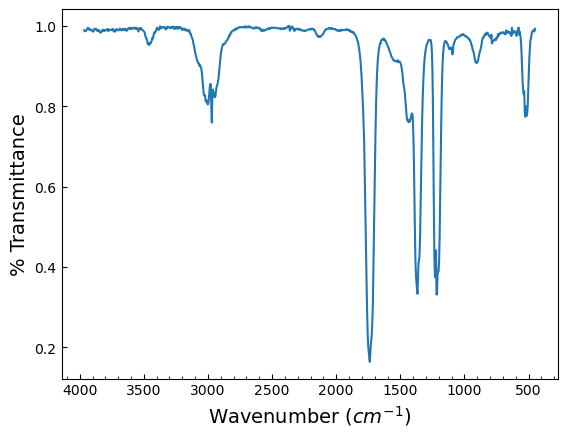

In [4]:
jcamp_dict = jcamp_read(io.StringIO(spec.jdx_text))
x = jcamp_dict['x']
y = jcamp_dict['y']
xunits = jcamp_dict['xunits']
yunits = jcamp_dict['yunits']
if(yunits == 'ABSORBANCE'):
    y = 10**-y
    yunits = "% Transmittance"
elif (yunits == 'TRANSMITTANCE'):
    y = y*100
    yunits = "% Transmittance"
if(xunits == '1/CM'):
    xunits = "Wavenumber ($cm^{-1}$)"
plt.plot(x, y)
fsize = 14
plt.xlabel(xunits, fontsize=fsize)
plt.ylabel(yunits, fontsize=fsize)
plt.gca().invert_xaxis()

plt.gca().xaxis.set_minor_locator(MultipleLocator(100))
plt.gca().xaxis.set_tick_params(direction = 'in', which='both')
plt.gca().yaxis.set_tick_params(direction = 'in')